# Load Excel Data and Plot & Analyze it
Using 
* Numpy
* Matplotlib
* Pandas (for import --> there are lots of options for this, e.g. openpyxl)

In [215]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
# from openpyxl import load_workbook
%matplotlib inline

# 1. Read Data from Excel and Put it in Array
* Read Excel with `pandas`

In [4]:
df = pd.read_excel(r'Sweep0_12.xlsx',names=['initial'])

In [5]:
df

,initial
0,-778125.00
1,-79375.00
2,-765625.00
3,-753125.00
4,-75625.00
5,-740625.00
6,-734375.00
7,-759375.00
8,-759375.00
9,-734375.00


###  You can of course plot and stuff in `pandas`
* but we will use Numpy for analysis 

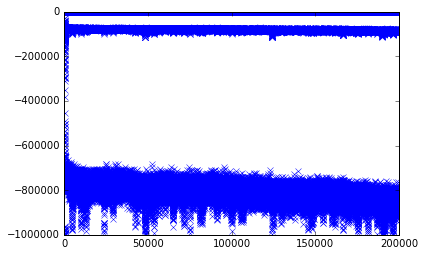

In [35]:
df.plot(marker ='x',linewidth=0,ylim=(-1000000, 0),legend=False)
#data[:100].plot(linewidth=1,style='rx',linewidth=1,color='b')
plt.show()

Getting it in numpy array

In [7]:
data = df.as_matrix(columns=['initial'])

In [11]:
data

array([[ -7.78125000e+05],
       [ -7.93750000e+04],
       [ -7.65625000e+05],
       ..., 
       [ -8.28125000e+05],
       [ -8.37500000e+01],
       [ -8.43750000e+04]])

In [10]:
data.size

199999

Plotting `numpy` array with `matplotlib`

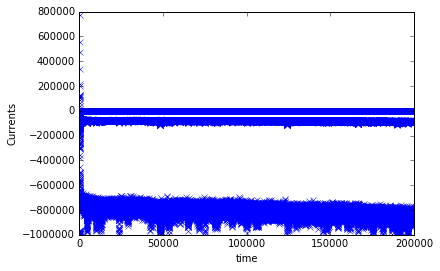

In [36]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data,'x')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

# 2. Identifying Peaks
## 2.1 Thresholding

### 2.1.1 With respect to general Average

In [17]:
average = np.mean(data)
print(average)

-459198.746357


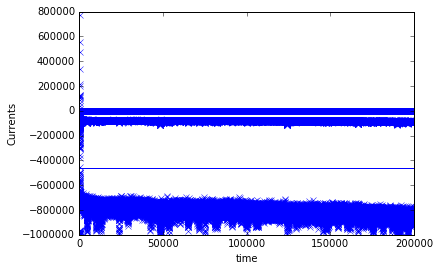

In [37]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data,'x')
ax.axhline(average)
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

Thresholding all values less than average

In [24]:
data1 = np.where(data>average,0,data)

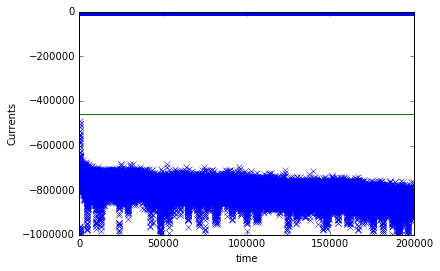

In [39]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data1,'x',color='b')
ax.axhline(average,color='g')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

### 2.1.2 Find the Mean Noise in Data 


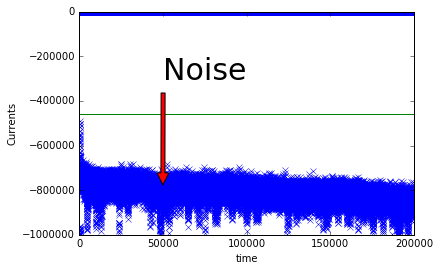

In [40]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data1,'x',color='b')
ax.axhline(average,color='g')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
ax.annotate('Noise',xy=(50000,-800000),xycoords='data',xytext=(100000,-200000),textcoords='data',arrowprops=dict(facecolor='red',shrink=0.05),horizontalalignment='right', verticalalignment='top',fontsize=30)
plt.show()

### 2.1.2 Remove all the data points less than mean threshold

In [52]:
data2 = data1[data1<average]

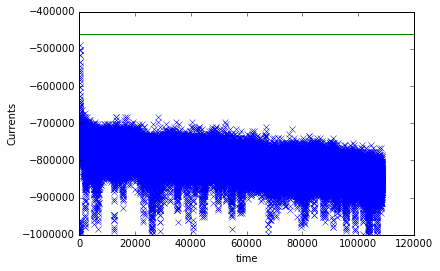

In [53]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data2,'x',color='b')
ax.axhline(average,color='g')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

### Fitting a linear function to noise

In [61]:
#np.polyfit : fit polynomial on data 
func = np.polyfit(np.arange(data2.size),data2, 1)# 1st order polynomial fit :: Line


In [62]:
np.polyfit?

In [59]:
func

array([ -7.24704072e-01,  -7.69783583e+05])

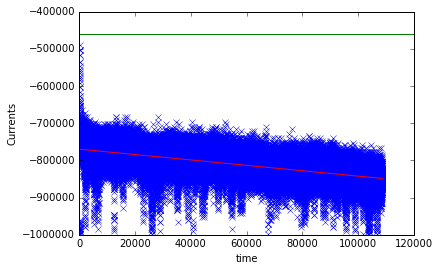

In [60]:
#Plotting noise with fit
xfit = np.array([0,data2.size])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data2,'x',color='b')
ax.plot(xfit,func[0]*xfit+func[1],'r')#Plotting the fitted line
ax.axhline(average,color='g')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [63]:
# Substract the fit from the data : De-trending the data
data3 = np.subtract(data2, func[0]*np.arange(data2.size)+func[1])

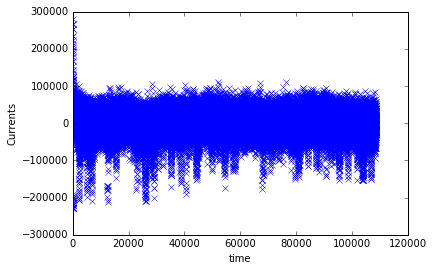

In [67]:
#Plotting Noise fit substracted
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data3,'x',color='b')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [70]:
#Take Out all values above 0
data4 = data3[data3<0]

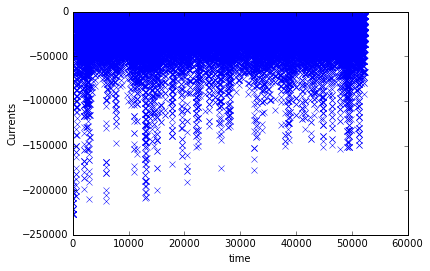

In [71]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4,'x',color='b')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [72]:
newaverage= np.mean(data4)

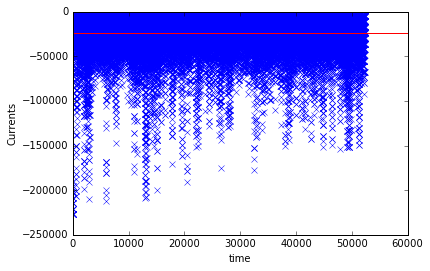

In [77]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4,'x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

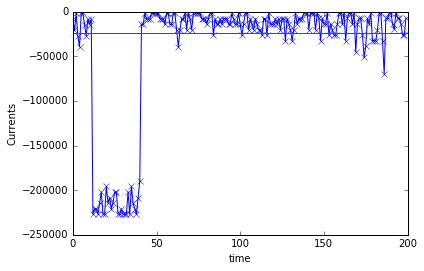

In [79]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4[0:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

# 3. Calculate Width of the peaks


In [95]:
minvalue = np.min(data4)

In [96]:
minvalue

-227021.12105888524

In [99]:
data5 = np.where(data4<newaverage,minvalue,data4)#all less than average is set to max
data6 = np.where(data4>newaverage,0,data5)#all more than average is set to zero

In [221]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data6[:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

## TASK : 
* Calculate Moving Average with number of elements used = 3 of latest data

In [137]:
# Calculating MOVING AVERAGE : 
data7 = np.convolve(data6,np.ones(3)/3)

In [220]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data7[:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

# TASK : 
* Count the width of all the spikes

In [222]:
# Array that indicates all the data that are not zero
isnotzero = np.concatenate(([0], (data6<0).view(np.int8), [0]))

In [223]:
isnotzero

array([0, 0, 0, ..., 1, 0, 0])

In [224]:
#
absdiff = np.abs(np.diff(isnotzero))

In [225]:
absdiff

array([0, 0, 0, ..., 1, 1, 0])

In [227]:
ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
widthArray = np.array([x[1]-x[0] for x in ranges])

In [228]:
widthArray

array([ 2,  1, 29, ...,  1,  2,  1])

In [232]:
plt.hist(widthArray,bins=np.arange(np.max(widthArray)))

(array([  0.00000000e+00,   3.92200000e+03,   2.33600000e+03,
          1.11900000e+03,   5.39000000e+02,   2.30000000e+02,
          1.45000000e+02,   8.80000000e+01,   5.20000000e+01,
          3.40000000e+01,   1.80000000e+01,   2.00000000e+01,
          7.00000000e+00,   8.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

In [230]:
correctedWidthArray = widthArray[widthArray>2]

In [231]:
plt.hist(correctedWidthArray,bins=np.arange(np.max(widthArray)))

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.11900000e+03,   5.39000000e+02,   2.30000000e+02,
          1.45000000e+02,   8.80000000e+01,   5.20000000e+01,
          3.40000000e+01,   1.80000000e+01,   2.00000000e+01,
          7.00000000e+00,   8.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

In [218]:
%matplotlib auto

Using matplotlib backend: MacOSX
